# Что сделано

* Создан докер контейнер
* сокращены функции ```Context.__repr__```, ```Context.pretty_repr```
* вынес конструкцию ```a if a is not None else b``` в функцию ```get_not_none(a,b)```
* В очередной раз поменял синтаксис из-за ```networkx```
* Начал удалять переменные ```y_pred_mean```, ```y_fact_mean``` - надо перенести их в разряд метрик

In [1]:
import numpy as np
import pandas as pd

from catboost import CatBoostClassifier, Pool, CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import sys
BASE_PATH = os.path.realpath('..')
DATASETS_DIR = os.path.join(BASE_PATH, 'datasets')
LIB_DIR = os.path.join(BASE_PATH,'lib')
if LIB_DIR not in sys.path:
    sys.path.append(LIB_DIR)

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from importlib import reload

In [3]:
import fca_interp as fcai

In [320]:
from importlib import reload

In [321]:
mango_ds = pd.read_csv(os.path.join(DATASETS_DIR, 'mango.csv'))
mango_ds.index = mango_ds['title']
mango_ds = mango_ds.drop('title',1)
mango_ds

,color,firm,smooth,form,fruit
title,,,,,
apple,yellow,False,True,round,True
grapefruit,yellow,False,False,round,True
kiwi,green,False,False,oval,True
plum,blue,False,True,oval,True
toy cube,green,True,True,cubic,False
egg,white,True,True,oval,False
tennis ball,white,False,False,round,False
mango,green,False,True,oval,True


In [323]:
mango_bin_ds = mango_ds.copy()
for f in mango_bin_ds.columns:
    if mango_bin_ds[f].dtype!=bool:
        for v in mango_bin_ds[f].unique():
            mango_bin_ds[f"{f}__is__{v}"] = mango_bin_ds[f]==v
        mango_bin_ds = mango_bin_ds.drop(f,1)

In [386]:
fcai = reload(fcai)

In [387]:
cntx = fcai.Context(mango_bin_ds)
fm = fcai.FormalManager(cntx)
fm.construct_concepts()
fm.construct_lattice()

In [392]:
fig = fm.get_plotly_fig()

In [393]:
fig.show()

In [533]:
bank_ds = pd.read_csv(os.path.join(DATASETS_DIR, 'bank.csv'), sep=';')

for f in ['default','y','housing','loan']:
    bank_ds[f] = (bank_ds[f]=='yes').astype(int)
cat_feats = ['job','marital','education', 'default','housing','loan', 'contact','month','poutcome', ]
real_feats = ['age','balance','day','duration','campaign','pdays','previous']
bank_ds

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [534]:
total_true = bank_ds["y"]
from catboost import CatBoostClassifier, Pool
pool = Pool(bank_ds[cat_feats+real_feats], bank_ds['y'], cat_features=cat_feats)
bb = CatBoostClassifier()
bb.fit(pool, verbose=False, plot=False)
total_preds = bb.predict(pool)

In [535]:
thresholds = {'age':[20, 30, 40, 50, 60],
              'balance':[0, 10, 100, 1000, 10000],
              'day':[10,20,25],
              'duration':[0,60,300, 600, 900],
              'campaign':[1,2],
              'pdays':[200,400],
             }
cases = {'pdays':[-1],
        'previous':[0]}

In [578]:
fcai = reload(fcai)

In [579]:
bank_bin_ds, feat_orders = fcai.Context.binarize_ds(bank_ds, cat_feats, thresholds, cases)

In [580]:
from sklearn.metrics import accuracy_score

In [762]:
fs_short = fcai.Context.squeeze_bin_dataset(bank_bin_ds, total_preds, metric=accuracy_score, metric_lim=0.98, use_tqdm=True)






  0%|          | 0/130 [00:00<?, ?it/s]




  1%|          | 1/130 [00:00<01:16,  1.68it/s]




  2%|▏         | 2/130 [00:01<01:16,  1.68it/s]




  2%|▏         | 3/130 [00:01<01:15,  1.68it/s]




  3%|▎         | 4/130 [00:02<01:14,  1.68it/s]




  4%|▍         | 5/130 [00:02<01:14,  1.67it/s]




  5%|▍         | 6/130 [00:03<01:14,  1.67it/s]




  5%|▌         | 7/130 [00:04<01:13,  1.68it/s]




  6%|▌         | 8/130 [00:04<01:12,  1.68it/s]




  7%|▋         | 9/130 [00:05<01:12,  1.67it/s]




  8%|▊         | 10/130 [00:05<01:11,  1.68it/s]




  8%|▊         | 11/130 [00:06<01:10,  1.69it/s]




  9%|▉         | 12/130 [00:07<01:09,  1.70it/s]




 10%|█         | 13/130 [00:07<01:08,  1.70it/s]




 11%|█         | 14/130 [00:08<01:08,  1.71it/s]




 12%|█▏        | 15/130 [00:08<01:07,  1.71it/s]




 12%|█▏        | 16/130 [00:09<01:06,  1.72it/s]




 13%|█▎        | 17/130 [00:10<01:05,  1.73it/s]




 14%|█▍        | 18/130 [00:10<01:10,  1.59it/s]




 15%|█

In [763]:
bank_bin_ds_short = bank_bin_ds[fs_short]

In [764]:
bank_bin_ds_short.shape, bank_bin_ds_short.drop_duplicates().T.drop_duplicates().T.shape

((4521, 15), (1339, 15))

In [765]:
bank_bin_ds_short[total_preds==1].shape, bank_bin_ds_short[total_preds==1].drop_duplicates().T.drop_duplicates().T.shape

((374, 15), (334, 15))

In [796]:
fcai = reload(fcai)

In [797]:
cntx_full = fcai.Context(bank_bin_ds, y_true=total_true, y_pred=total_preds)

In [ ]:
flg_true = total_preds==1
cntx_true = fcai.Context(bank_bin_ds_short[flg_true], y_true=total_true[flg_true], y_pred=total_preds[flg_true])
fm = fcai.FormalManager(cntx_true, task_type='binary classification', )
fm.construct_concepts(algo='mit')
fm.calc_strongness(cntx_full)
fm.filter_concepts(fltr=lambda c: c._metrics['strongness']>0.5)
fm.construct_lattice()
fm.calc_stability_approx()
#fm.filter_concepts(fltr=lambda c: c._metrics['lstab_min_bound'] is not None and c._metrics['lstab_min_bound']>0)
#fm.construct_lattice()

In [780]:
len(fm.get_concepts())

4112

In [782]:
fm.calc_strongness(cntx_full)

In [790]:
len([c._metrics['strongness'] for c in fm.get_concepts() if c._metrics['strongness']>=0.5])

760

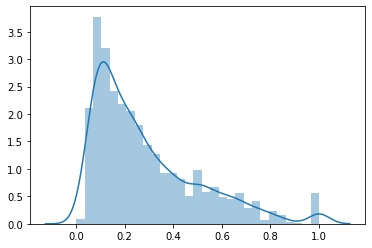

In [785]:
sns.distplot([c._metrics['strongness'] for c in fm.get_concepts()])

In [744]:
fig = fm.get_plotly_fig(color_by='strongness', sort_by='y_pred_mean', level_sort='all')

In [745]:
fig.show()

In [750]:
strong_concepts = sorted(fm.get_concepts(), key=lambda c: -c._metrics['strongness'])

In [755]:
xaxis = np.arange(1, len(strong_concepts))
yaxis = np.array([len(set([g for c in strong_concepts[:x] for g in c.get_extent()])) for x in xaxis])

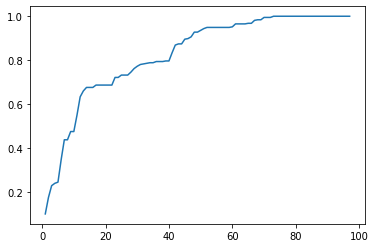

In [757]:
plt.plot(xaxis, yaxis/len(cntx_true.get_objs()))

In [761]:
strong_concepts[10]

Concept 114
level: 3
extent (len: 53): 33, 125, 702, 1914, 1991, 164, 202, 327, 661, 2887, 415, 3614, 3642, 630, 705, 1446, 823, 1297, 3413, 1334, 1437, 1449, 1534, 1557, 3754, 1611, 1638, 1669, 1899, 1905, 2017, 2140, 2347, 2464, 2481, 2633, 2674, 2772, 2826, 3932, 2851, 2871, 3224, 3304, 3502, 3673, 3684, 3889, 3914, 3956, 4217, 4263, 4275
intent (len: 3): duration__geq__600, education__is__tertiary, day__geq__10
new extent (len: 53): 1914, 3614, 1899, 630, 2633, 3889, 1638, 1905, 823, 3224, 3642, 4263, 2140, 125, 4217, 3413, 1611, 4275, 661, 3502, 202, 3304, 705, 702, 2674, 3684, 2851, 33, 327, 415, 1534, 2826, 2887, 2017, 2871, 1669, 3914, 2481, 1557, 3673, 1449, 3932, 164, 1437, 3956, 1991, 1446, 2464, 1297, 1334, 2772, 2347, 3754
new_intent (len: 0): ∅
lower neighbours (len: 0): ∅
upper neighbours (len: 4): 8, 29, 46, 6
metric accuracy = 0.91
metric precision = 0.91
metric recall = 1.0
metric neg_precision = 0.0
metric neg_recall = 0.0
metric f1_score = 0.95
metric y_pred_mean = 